In [1]:
import numpy as np
import random
np.set_printoptions(suppress=True)

In [2]:
life = lambda x: x*0.0042083333333333-0.2425

In [3]:
years = range(60, 100)
probs = list(map(life, years))

In [61]:
def sim_run(start_value, growth_mu, growth_std, withdraw, lower_bound):
    port_val = start_value
    for year in probs:
        val = random.uniform(0, 1)
        if val < year:
            return port_val
        else:
            withdrawal_amount = port_val * withdraw
            if withdrawal_amount < lower_bound:
                withdrawal_amount = lower_bound
            ret = np.random.normal(growth_mu, growth_std, 1)[0]
            port_val = port_val * (1 + ret) - withdrawal_amount
            if port_val < 0:
                return 0
    return port_val

def sim_run_30(start_value, growth_mu, growth_std, withdraw, lower_bound):
    port_val = start_value
    for year in range(0,30):
        withdrawal_amount = port_val * withdraw
        if withdrawal_amount < lower_bound:
            withdrawal_amount = lower_bound
        ret = np.random.normal(growth_mu, growth_std, 1)[0]
        port_val = port_val * (1 + ret) - withdrawal_amount
        if port_val < 0:
                return 0
    return port_val

In [34]:
withdraw = 0.03
start_value = 500_000
lower_bounds = np.linspace(0, 30_000, 100)
res = []

for lower_bound in lower_bounds:
    sim_results = []
    for i in range(0, 1000):
        sim_results.append(sim_run(start_value, 0.03, 0.05, withdraw, lower_bound))
    res.append((lower_bound, np.percentile(sim_results, 5)))

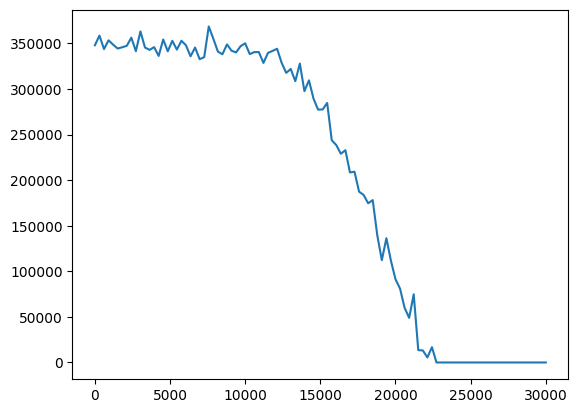

In [35]:
from matplotlib import pyplot as plt

plt.plot([i[0] for i in res], [i[1] for i in res])
plt.show()

In [62]:
withdraw = 0.03
start_value = 500_000
lower_bounds = np.linspace(0, 30_000, 100)
res = []

for lower_bound in lower_bounds:
    sim_results = []
    for i in range(0, 1000):
        sim_results.append(sim_run_30(start_value, 0.03, 0.05, withdraw, lower_bound))
    res.append((lower_bound, np.percentile(sim_results, 5)))

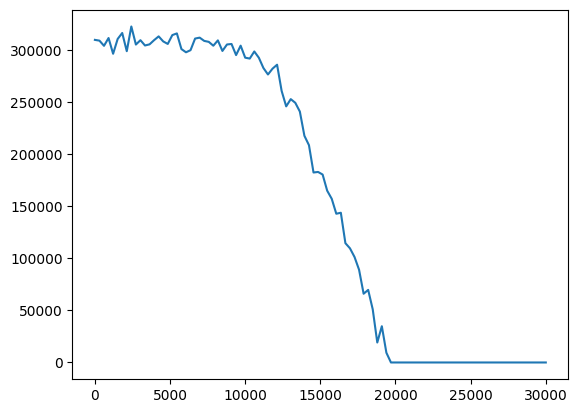

In [63]:
from matplotlib import pyplot as plt

plt.plot([i[0] for i in res], [i[1] for i in res])
plt.show()

In [56]:
withdraw = 0.03
start_value = 500_000
portfolio_mus = np.linspace(-0.07, 0.07, 500)
res = []

for mu in portfolio_mus:
    sim_results = []
    for i in range(0, 1000):
        sim_results.append(sim_run(start_value, mu, 0.05, withdraw, 0))
    res.append((mu, np.percentile(sim_results, [1, 5, 50, 95])))

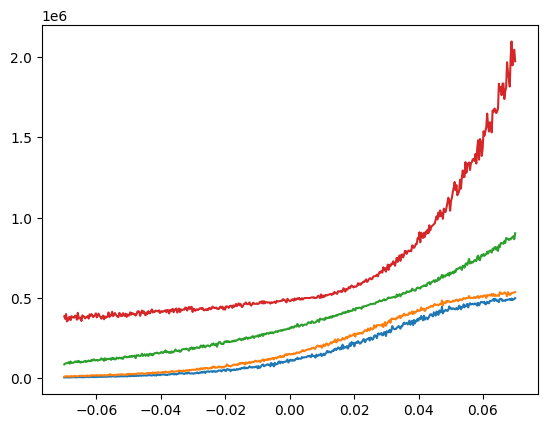

In [57]:
from matplotlib import pyplot as plt

plt.plot([i[0] for i in res], [(i[1][0], i[1][1], i[1][2], i[1][3]) for i in res])
plt.show()

In [70]:
withdraw = 0.03
start_value = 500_000
portfolio_mus = np.linspace(-0.07, 0.07, 500)
res = []

for mu in portfolio_mus:
    sim_results = []
    for i in range(0, 1000):
        sim_results.append(sim_run_30(start_value, mu, 0.05, withdraw, 0))
    res.append((mu, np.percentile(sim_results, [1, 5, 50, 95])))

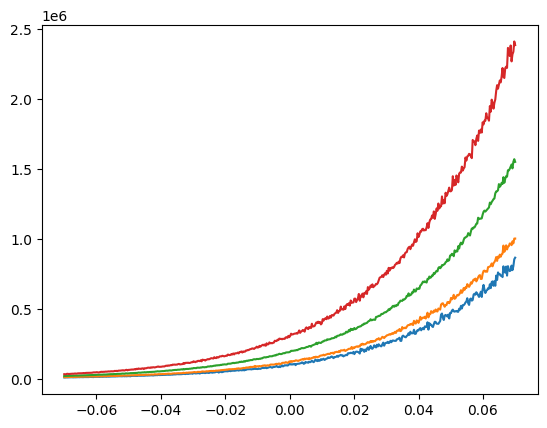

In [73]:
from matplotlib import pyplot as plt

plt.plot([i[0] for i in res], [(i[1][0], i[1][1], i[1][2], i[1][3]) for i in res])
plt.show()

In [52]:
withdraw = 0.03
start_values = np.linspace(200_000, 1_250_000, 500)
res = []

for start in start_values:
    sim_results = []
    for i in range(0, 1000):
        sim_results.append(sim_run(start, 0.03, 0.05, withdraw, 25_000))
    res.append((start, np.percentile(sim_results, [1, 5, 50, 95])))

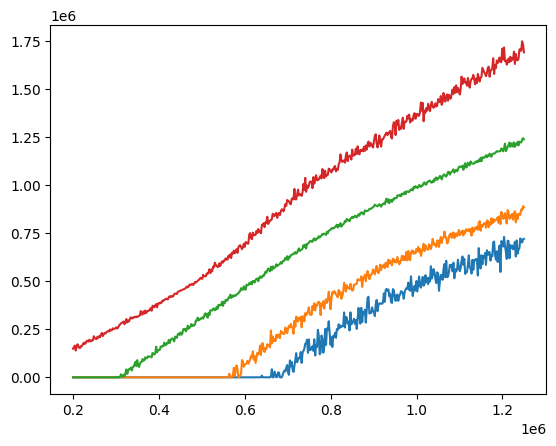

In [53]:
from matplotlib import pyplot as plt

plt.plot([i[0] for i in res], [(i[1][0], i[1][1], i[1][2], i[1][3]) for i in res])

plt.show()

In [66]:
withdraw = 0.03
start_values = np.linspace(200_000, 1_250_000, 500)
res = []

for start in start_values:
    sim_results = []
    for i in range(0, 1000):
        sim_results.append(sim_run_30(start, 0.03, 0.05, withdraw, 25_000))
    res.append((start, np.percentile(sim_results, [1, 5, 50, 95])))

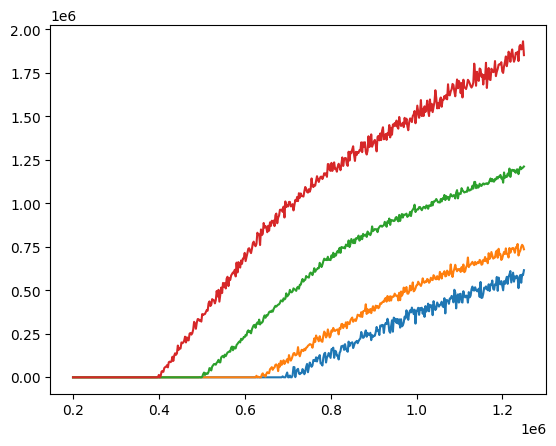

In [67]:
from matplotlib import pyplot as plt

plt.plot([i[0] for i in res], [(i[1][0], i[1][1], i[1][2], i[1][3]) for i in res])
plt.show()

Safe withdrawal rate calculations tell you what income you can take from a portfolio without taking high levels of capital risk. These calculations tend to have a few problems.

First, limited samples. Using data from only one country or one period from one country will, typically, lead to a poor estimate of a safe withdrawal rate out-of-sample. There is no easy way around this because we cannot, easily, create a forecast of future returns or volatility. But most analyses tend towards the optimistic rather than including less favourable samples that give more ambiguous results.

Second, the value computed is a usually a maximum safe rate. We take S&P500/bond returns, we compute some maximum, and this is safe through some circular reference of risk like: this would have worked 90% of the time. Maxmium values computed this way are not robust, they are fit to the sample but generalize very poorly. At the very least, a block bootstrap of a misleading sample would obtain a maxmimum. A single point estimate is useless.

Third, most analysis assume a fixed lifetime, typically 30 years. You be seeing a trend here: we take the life expectancy, people live X on average, we just use that singe point estimate. In reality, life expectancy is a random variable and changes as we get older.

Fourth, as we can see above, single point estimates proliferate. Risk is not displayed at the median or on average. A river may be 5ft deep on average but if the max depth is 9ft then that information is unhelpful. Risk cannot be controlled: we cannot control death, we cannot control future returns but we should be able to understand some of the risks presented.

We cannot fix all these issues but this post will focus on examining how life expectancy impacts capital risk under withdrawal.

Throughout we model the probability of death annually as:

Pr(d = f(a)) = a*0.004208-0.2425, where a = age

This function was computed from the age of 60+ on citizens in the UK (iirc). Returns are modelled as normal throughout as we are not looking to replicate the behaviour of the stock market but looking at the behaviour of risk given our assumptions. One of these assumptions is normally-distributed returns.

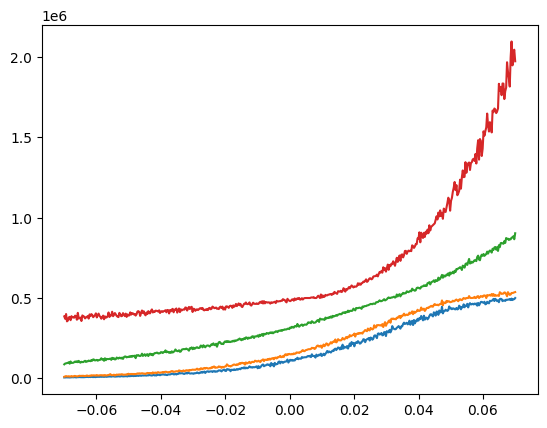

This charts shows the sensitivity of end-of-life portfolio values (y-axis, starting value of 0.5e6 or 500,000) to investment returns (x-axis) across the 95 (red)/50 (green)/5 (yellow)/1 (blue) percentiles.

In this simulation an investor starts with 500,000 then returns are generated according to a mean value (graphed along the x-axis) and with standard deviation of 5% then we withdraw at a rate of 3% of portfolio value. Our investor then either dies at we take this end-of-life value, or the investor goes onto another year.

If we look at the same chart with a fixed 30-year lifespan, we see a clear difference (log-scaled, the unscaled versions are just exponential hockey sticks):

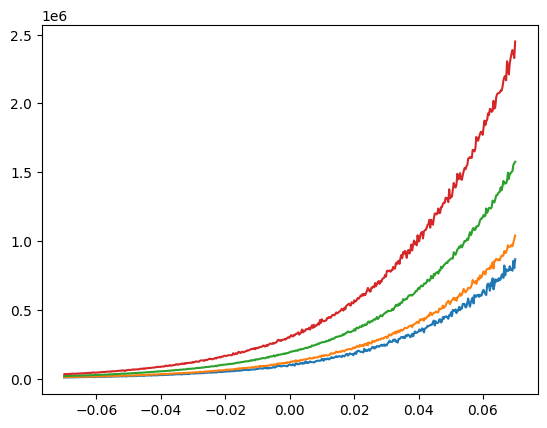

Only in the 95th percentile and only when the return exceeds the withdrawal rate by over 100bps do we actually get to experience the hockey stick in reality. At the median and below, we actually see far more smooth increases in end of life values as returns increase. Indeed, at the 5th percentile we see very little improvement to end values even beyond 100bps.

This diverges so heavily from the static analysis favoured in the industry for a few reasons, some of which are not important but some are.

The unimportant is the risk of dying quickly. At high returns, the 5th percentile results aren't great because the worst 5% results are drawn for a few years and then we die. This is not great, but is relatively uninteresting because this risk is unavoidable.

The important is the alternate view on risk. In the analysis with correctly computed lifespans, the risk of going near zero occurs at far higher rates of return and significantly compresses the upside of higher returns in the median case.

This is not to take any particular viewpoint when it comes to returns. Normally distributed returns fail to represent the volatility of real-world markets, and volatility is important for considering withdrawal strategies. If you believe that returns will exceed withdrawal rates (for example, if you have a high level of capital), this changes nothing. But, given these assumptions, it demonstrates the misleading perception of risk in models that fail to model life randomly.

The 